## Chapter 1 - The Machine Learning landscape

# Setup
First, let's make sure this notebook works well in both python2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to ensure the outputs are consistent between runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

# tight layout is to make labels of subplots to fit better to the whole figure
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# ignore warnings
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

## Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # This is for filtering out all that inequality isn't equal to TOT
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # This is a reshape, basically takes as main column the country, the Indicator as a secondary pivot
    # and the values corresponding to the pair, Country-Indicator.
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # the dataframe contains row indexes starting from 0, this takes the specified column and uses it
    # as the index, it might facilitate taking values by Country name instead of numered index
    gdp_per_capita.set_index("Country", inplace=True)
    # notice both dataframes has the "Country" index, this is why they can be merged
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
    

The code in the book expects the data files to be located in the current directory.

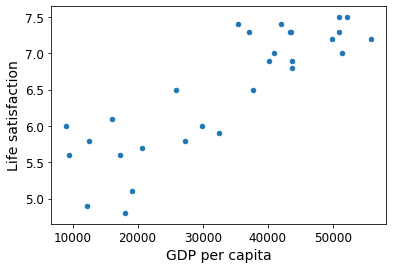

[[5.96242338]]


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecd_bli_path = "../datasets/lifesat/oecd_bli_2015.csv"
gdp_per_capita_path = "../datasets/lifesat/gdp_per_capita.csv"

# Load the data
oecd_bli = pd.read_csv(oecd_bli_path, thousands=',')
gdp_per_capita = pd.read_csv(gdp_per_capita_path,
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1',
                             na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# Dependent variable is the GDP per capita
# X in mayus because normally this would be a vector not just a single value

# The numpy feature .c_[] makes possible stacking different arrays
# This is for getting the value as vectors
X = np.c_[country_stats["GDP per capita"]]
# Independent variable would be the happines index
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
x_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(x_new)) # outputs [[5.96242338]]

# Data exploration and preparation
This section is not completely related to Machine Learning, but it serves as reference when manipulating data with pandas and numpy and ploting with matplotlib

In [6]:
import pandas as pd

oecd_bli_path = "../datasets/lifesat/oecd_bli_2015.csv"

oecd_bli = pd.read_csv(oecd_bli_path, thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


Notice how the information is displayed, this is basically the file format as is, now we are going to create a pivot table with the Country as index (becomes the rows), the Indicator as column (new colums) and the "Value" as the values per se.

In [7]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


Notice this time, every country appears as rows and every Indicator appear as columns, and the value for the corresponding Country-Indicator appears in each cell. Basically, the raw information appeared flat and here we are just reorganizing it.

Now let's print the columns, these are the indicatos, among them should be the 'Life satisfaction' indicator, which is the one we are interested in.

In [8]:
oecd_bli.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

Now let's explore this indicator

In [9]:
oecd_bli["Life satisfaction"].head(10)

Country
Australia         7.3
Austria           6.9
Belgium           6.9
Brazil            7.0
Canada            7.3
Chile             6.7
Czech Republic    6.5
Denmark           7.5
Estonia           5.6
Finland           7.4
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita

In [10]:
gdp_per_capita_path = "../datasets/lifesat/gdp_per_capita.csv"

gdp_per_capita = pd.read_csv(gdp_per_capita_path, thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [11]:
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In the GDP per capita dataset, the value is in the '2015' column, let's rename it for clarity

In [12]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Now, notice in this dataset, the index of each row is just an incrementing number, we want to join this dataset with the oecd by country, so to make our lives easier, let's use the Country column as index instead

In [13]:
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Now let's create a full dataset, i.e., merge both oecd and gdp datasets

In [15]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [16]:
full_country_stats.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')

Notice now we have a dataset with both the Life satisfaction and the GDP per capita

In [17]:
full_country_stats[["GDP per capita", "Life satisfaction"]]
# full_country_stats[["GDP per capita", "Life satisfaction"]].loc["Brazil"]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


For training and experimenting, let's arbitrarily remove some indexes from the original dataset

In [18]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
# Simple set operation, get the set containing all the elements from - to 36 that are not in the remove_indices
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[remove_indices]

In [19]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


Now let's do some plotting, here we will do a scatter plot with additional features for reference

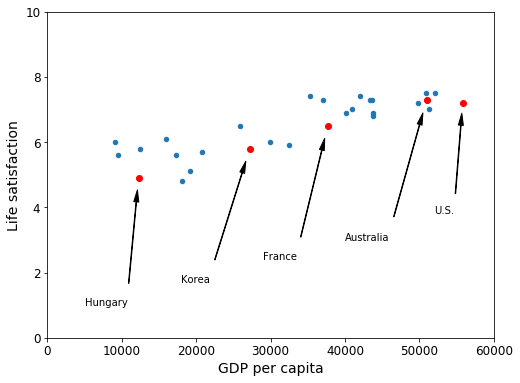

In [21]:
# Pandas dataframe integrates with matplotlib
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8,6))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8)
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.show()

Let's save the sample data too, for later reference, now that we preprocessed the data

In [22]:
lifestat_path = "../datasets/lifesat/lifestat.csv"
sample_data.to_csv(lifestat_path)

Let's display the actual values for the red dot's shown in the figure, just for reference

In [23]:
sample_data.loc[position_text.keys()]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Now let's experiment with a few linear models to observe how well a line is adjusted, at least visually

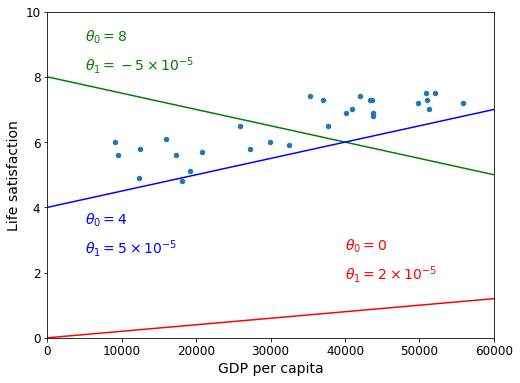

In [24]:
import numpy as np

sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8, 6))
plt.axis([0, 60000, 0, 10]) # first pair would be the possible values in X axis, and the second pair, the Y axis
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r") # plot a line using all X but different values for Y and paint it in red "r"
# This model does not have intercept, starts from origin
# The first two args are the coordinates we want the text to appear
# The second is the expression in Math format
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

Now let's train a model with scikit to get the best fit for this data points

In [25]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

#Get the model parameters
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

Let's plot this line, notice we also obtained the intercept and coefficient i.e., the model parameters

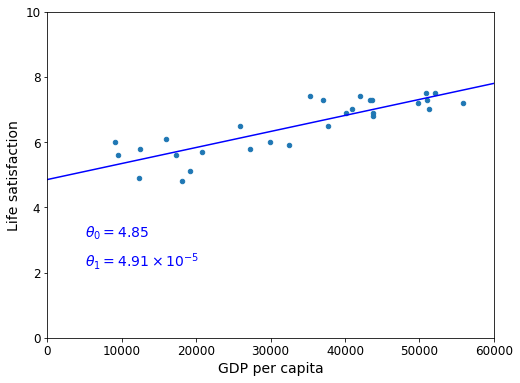

In [26]:
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8, 6))
plt.axis([0, 60000, 0, 10]) # first pair would be the possible values in X axis, and the second pair, the Y axis
X=np.linspace(0, 60000, 1000)

plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

Now let's use the obtained model to predict the Life satisfaction in Cyprus, based on a GDP per capita value

In [27]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print("Cyprus' GDP per capita: {:.2f}".format(cyprus_gdp_per_capita))
cyprus_predicted_ls = lin1.predict([[cyprus_gdp_per_capita]])
print("Cyprus' predicted life satisfaction: {:.2f}".format(cyprus_predicted_ls[0][0]))

Cyprus' GDP per capita: 22587.49
Cyprus' predicted life satisfaction: 5.96


Now let's plot this value to see where it fits

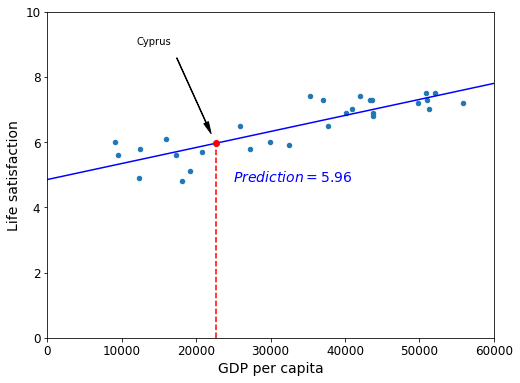

In [28]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8,6))

# plot the model line
plt.axis([0, 60000, 0, 10]) # first pair would be the possible values in X axis, and the second pair, the Y axis
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")

# Now let;s plot Cyprus
cyprus_x = cyprus_gdp_per_capita
cyprus_y = cyprus_predicted_ls[0][0]
plt.annotate("Cyprus", xy=(cyprus_x, cyprus_y), xytext=(12000, 9),
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
plt.plot(cyprus_x, cyprus_y, "ro")
plt.plot([cyprus_x, cyprus_x], [0, cyprus_y], "r--")
plt.text(25000, 4.8, r"$Prediction = 5.96$", fontsize=14, color="b")

plt.show()

Now let's include the missing countries and explore how they change the initial model.

Also we will explore a polynomial model, which is more complex because will use more parameters to try to fit the data, the problem is that with an overcomplex model, we might be falling in overfitting.

In [29]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [30]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

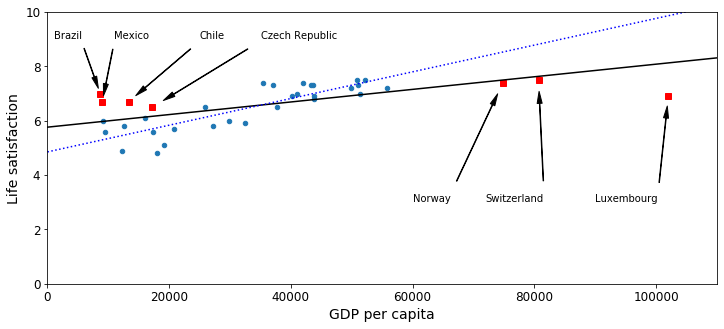

In [31]:
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(12,5))
plt.axis([0, 110000, 0, 10])

# Add the missing countries
for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'rs')

# Plot different model lines
# Train a model using all the data
lin_reg_full = linear_model.LinearRegression()
X_full = np.c_[full_country_stats["GDP per capita"]]
y_full = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(X_full, y_full)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

# Plot the model obtained without the missing countries
plt.plot(X, t0 + t1 * X, "b:")
plt.show()

Now, let's work on a polynomial model which will be able to feet all the data points, but at the same time, is causing overfitting, making it a weak model for predicting new values.

/home/ohtar10/miniconda3/envs/ml-python/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/home/ohtar10/miniconda3/envs/ml-python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


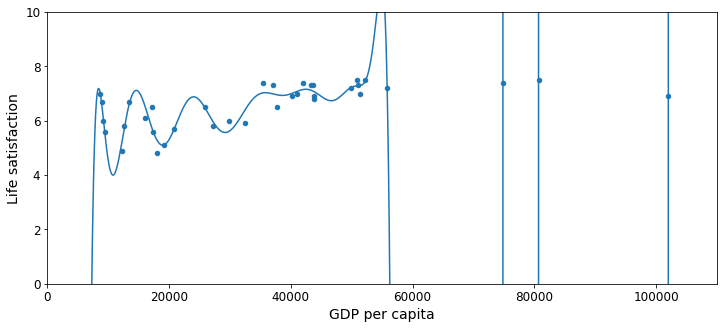

In [32]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(12, 5))
plt.axis([0, 110000, 0, 10])

# Create a pipeline for the polynomial model
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False) # Aim for a polynomial model of degree 60
scaler = preprocessing.StandardScaler()
lin_reg_2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg_2)])
pipeline_reg.fit(X_full, y_full)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.show()

Let's test the model, let's see in the original dataset what is the actual value for countries with 'W' in their name

In [33]:
# Remember we set the country as index for this dataframe, that's why this works
full_country_stats.loc[[c for c in full_country_stats.index if 'W' in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [34]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if 'W' in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Let's do, a regularized model, i.e., suppose we only have the sample data, but we want a robust model that be able to generalize even in absence of all the data.

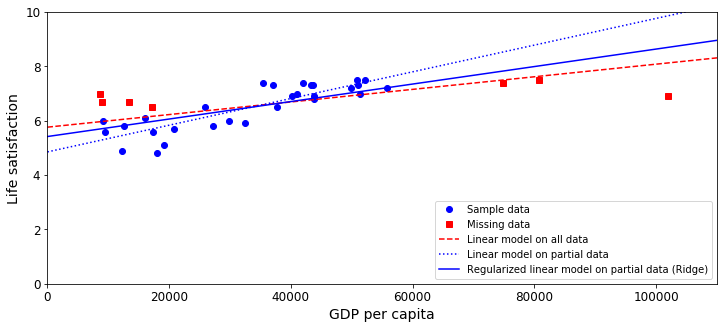

In [35]:
plt.figure(figsize=(12, 5))

plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")

plt.plot(sample_data["GDP per capita"], sample_data["Life satisfaction"], "bo", label="Sample data") # "blue dots"
plt.plot(missing_data["GDP per capita"], missing_data["Life satisfaction"], "rs", label="Missing data") # "red squares"

X = np.linspace(0, 110000, 1000) # Returns 1000 numbers with the same distance between them, between 0 and 110000

plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1 * X, "b:", label="Linear model on partial data")

# ridge regularization
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data (Ridge)")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

Let's try using another model, this time an instance based, e.g., KNN to predict the Life satisfaction of Cyprus

In [37]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life satisfaction"]]

model.fit(X, y)

X_new = np.array([[22587.0]]) # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.76666667]]
